This is still a work in progress.. check out the dataset if you would like to explore more: https://www.kaggle.com/mur418/espn-2019-stats-and-2020-nfl-fantasy-projections

# Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Gather Data

In [2]:
qbs = pd.read_csv('../input/espn-2019-stats-and-2020-nfl-fantasy-projections/qb_stats_and_projections.csv')
wrs = pd.read_csv('../input/espn-2019-stats-and-2020-nfl-fantasy-projections/wr_stats_and_projections.csv')
rbs = pd.read_csv('../input/espn-2019-stats-and-2020-nfl-fantasy-projections/rb_stats_and_projections.csv')
te = pd.read_csv('../input/espn-2019-stats-and-2020-nfl-fantasy-projections/te_stats_and_projections.csv')
dst = pd.read_csv('../input/espn-2019-stats-and-2020-nfl-fantasy-projections/defense_stats_and_projections.csv')
kickers = pd.read_csv('../input/espn-2019-stats-and-2020-nfl-fantasy-projections/kicker_stats_and_projections.csv')

In [3]:
#for now, lets rename defence team name to player name
temp_dst = dst.rename(columns={"TEAM NAME": "PLAYER NAME"})
temp_dst['PLAYER POSITION'] = 'DST'

#rename wrs position to player position .. just like the rest of the tables
wrs = wrs.rename(columns={"POSITION": "PLAYER POSITION"})

In [4]:
full_df = pd.concat([qbs, wrs, rbs, te, temp_dst, kickers])
print(full_df.columns)
names_2019_2020 = full_df[['PLAYER NAME', 'PLAYER POSITION','2019 FPTS', '2020 FPTS']]
names_2019_2020

Index(['Unnamed: 0', 'PLAYER NAME', 'TEAM NAME', 'PLAYER POSITION',
       '2019 COMPLETED PASS', '2019 ATTEMPTED PASS', '2019 PASSING YDS',
       '2019 PASSING TD', '2019 INT', '2019 CAR', '2019 RUSH YDS',
       '2019 RUSH TD', '2019 FPTS', '2020 COMPLETED PASS',
       '2020 ATTEMPTED PASS', '2020 PASSING YDS', '2020 PASSING TD',
       '2020 INT', '2020 CAR', '2020 RUSH YDS', '2020 RUSH TD', '2020 FPTS',
       '2020 OUTLOOK', 'TEAM', '2019 TAR', '2019 REC', '2019 REC YARDS',
       '2019 AVG REC YARDS', '2019 REC TDS', '2019 RUSH CAR',
       '2019 RUSH YARDS', '2019 RUSH TDS', '2020 TAR', '2020 REC',
       '2020 REC YARDS', '2020 AVG REC YARDS', '2020 REC TDS', '2020 RUSH CAR',
       '2020 RUSH YARDS', '2020 RUSH TDS', '2020 PLAYER OUTLOOK',
       '2019 RUSH AVG', '2019 REC YDS', '2020 RUSH AVG', '2020 REC YDS',
       '2020 REC TD', 'Player OUTLOOK', '2019 AVG REC YDS', '2019 REC TD',
       '2020 AVG REC YDS', '2019 SCK', '2019 FR', '2019 TD', '2019 PA',
       '2019 YA', '

,PLAYER NAME,PLAYER POSITION,2019 FPTS,2020 FPTS
0,Lamar Jackson,QB,415.68,338.23
1,Patrick Mahomes,QB,287.04,332.66
2,Deshaun Watson,QB,320.98,314.06
3,Dak Prescott,QB,337.78,301.71
4,Russell Wilson,QB,328.60,293.96
...,...,...,...,...
45,Mike Nugent,K,27.00,0.00
46,Graham Gano,K,NaN,0.00
47,Ryan Succop,K,22.00,0.00
48,Stephen Gostkowski,K,32.00,0.00


In [5]:
rbs

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 CAR,2019 RUSH YDS,2019 RUSH AVG,2019 RUSH TD,2019 REC,2019 REC YDS,...,2019 FPTS,2020 CAR,2020 RUSH YARDS,2020 RUSH AVG,2020 RUSH TD,2020 REC,2020 REC YDS,2020 REC TD,2020 FPTS,Player OUTLOOK
0,1,Christian McCaffrey,Panthers,RB,287.0,1387.0,4.8,15.0,116.0,1005.0,...,471.20,233.0,1048.0,4.5,9.0,90.0,736.0,3.0,333.95,McCaffrey returns as the feature back in Carol...
1,2,Ezekiel Elliott,Cowboys,RB,301.0,1357.0,4.5,12.0,54.0,420.0,...,311.70,282.0,1244.0,4.4,10.0,57.0,455.0,2.0,300.76,Elliott returns as the clear feature back in D...
2,3,Saquon Barkley,Giants,RB,217.0,1003.0,4.6,6.0,52.0,438.0,...,244.10,261.0,1176.0,4.5,10.0,57.0,458.0,3.0,292.33,Barkley's 2019 season fell short of lofty expe...
3,4,Dalvin Cook,Vikings,RB,250.0,1135.0,4.5,13.0,53.0,519.0,...,292.40,245.0,1051.0,4.3,10.0,64.0,536.0,1.0,291.72,Cook's career has thus far been marred by inju...
4,5,Alvin Kamara,Saints,RB,171.0,797.0,4.7,5.0,81.0,533.0,...,248.52,194.0,876.0,4.5,8.0,78.0,600.0,3.0,290.39,Kamara is coming off an up-and-down 2019 campa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Marshawn Lynch,FA,RB,12.0,34.0,2.8,1.0,0.0,0.0,...,9.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
251,252,Darren Sproles,Eagles,RB,17.0,66.0,3.9,0.0,6.0,24.0,...,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
252,253,LeSean McCoy,FA,RB,101.0,465.0,4.6,4.0,28.0,181.0,...,118.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
253,254,Alex Barnes,Titans,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.


In [6]:
names_2019_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PLAYER NAME      1002 non-null   object 
 1   PLAYER POSITION  1002 non-null   object 
 2   2019 FPTS        681 non-null    float64
 3   2020 FPTS        1001 non-null   float64
dtypes: float64(2), object(2)
memory usage: 39.1+ KB


# Plot 2020 vs 2019 points

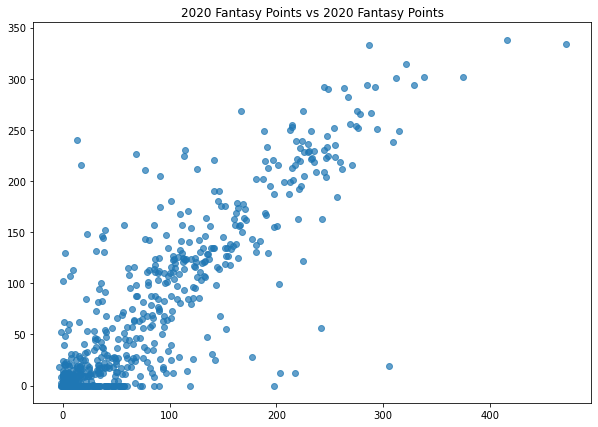

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(names_2019_2020['2019 FPTS'], names_2019_2020['2020 FPTS'], alpha = 0.7)
plt.title('2020 Fantasy Points vs 2020 Fantasy Points')
plt.show()

# Number of players per position

In [8]:
players_per_pos = full_df.groupby('PLAYER POSITION').size()
players_per_pos

PLAYER POSITION
--          1
DST        32
DT, RB      1
K          50
QB        124
RB        254
TE        190
WR        350
dtype: int64

In [9]:
full_df.loc[full_df['PLAYER POSITION'] == 'DT, RB']

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,...,2020 COMPLETED 1-39,2020 ATTEMPTED 1-39,2020 COMPLETED 40-49,2020 ATTEMPTED 40-49,2020 COMPLETED 50+,2020 ATTEMPTED 50+,2020 COMPLETED TOT,2020 ATTEMPTED TOT,2020 COMPLETED XP,2020 ATTEMPTED XP
108,109,Patrick Ricard,Ravens,"DT, RB",NaN,NaN,NaN,NaN,NaN,154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
full_df.loc[full_df['PLAYER POSITION'] == '--']
full_df = full_df.drop(190)

In [11]:
players_per_pos = full_df.groupby('PLAYER POSITION').size()
players_per_pos

PLAYER POSITION
DST        32
DT, RB      1
K          50
QB        124
RB        253
TE        190
WR        349
dtype: int64

In [12]:
players_per_pos.values

array([ 32,   1,  50, 124, 253, 190, 349])

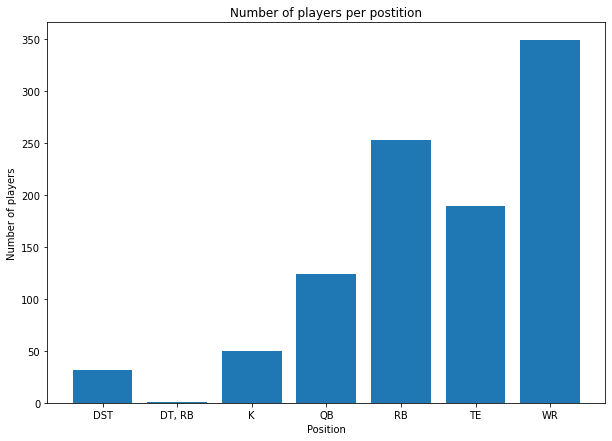

In [13]:
plt.figure(figsize=(10,7))
plt.bar(players_per_pos.index,players_per_pos.values)
plt.title('Number of players per postition')
plt.xlabel('Position')
plt.ylabel('Number of players')
plt.show()

# Which positions score most, on average?

In [14]:
avg_points_per_pos = full_df.groupby('PLAYER POSITION')['2019 FPTS'].mean()

In [15]:
avg_points_per_pos

PLAYER POSITION
DST        98.593750
DT, RB     18.700000
K          93.377500
QB        118.921389
RB         72.895119
TE         47.941667
WR         73.675812
Name: 2019 FPTS, dtype: float64

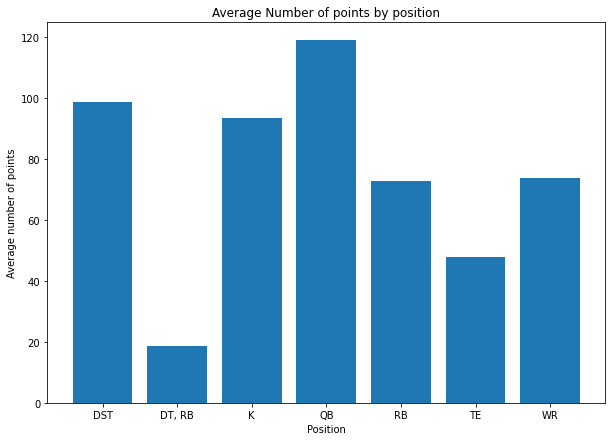

In [16]:
plt.figure(figsize=(10,7))
plt.bar(avg_points_per_pos.index,avg_points_per_pos.values)
plt.title('Average Number of points by position')
plt.xlabel('Position')
plt.ylabel('Average number of points')
plt.show()

The above plot shows average number of points per position.. but there are lots of zeros bringing the average down, especially for WR

# How many players are expected to score more than 15 fpts per game in 2020?

Each team plays 16 games. 

In [17]:
#15 points per game = 16 * 15 = 240
players_scoring_more_than_15_2020 = names_2019_2020.loc[names_2019_2020['2020 FPTS'] > (15*16)].sort_values('2020 FPTS').groupby('PLAYER POSITION').count()
players_scoring_more_than_15_2020

,PLAYER NAME,2019 FPTS,2020 FPTS
PLAYER POSITION,,,
QB,15,15,15
RB,8,8,8
TE,1,1,1
WR,7,7,7


In [18]:
#no defenses expected to score more than 15 points per game?
dst['2020 FPTS'].head() #nope

0    137.08
1    134.16
2    124.74
3    122.57
4    122.18
Name: 2020 FPTS, dtype: float64

Text(0, 0.5, 'Number of players')

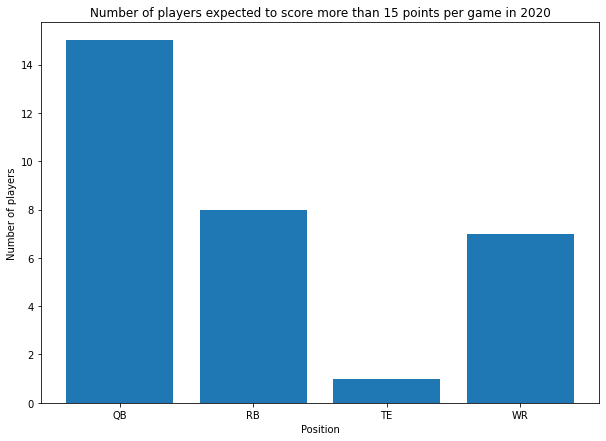

In [19]:
plt.figure(figsize=(10,7))
# print(players_scoring_more_than_15_2020.index)
# print(players_scoring_more_than_15_2020['PLAYER NAME'].to_list())



plt.bar(players_scoring_more_than_15_2020.index,players_scoring_more_than_15_2020['PLAYER NAME'].to_list())
plt.title('Number of players expected to score more than 15 points per game in 2020')
plt.xlabel('Position')
plt.ylabel('Number of players')
# plt.show()

# More than 20?

In [20]:
#20 points per game = 16 * 15 = 320
players_scoring_more_than_20_2020 = names_2019_2020.loc[names_2019_2020['2020 FPTS'] > 320].sort_values('2020 FPTS').groupby('PLAYER POSITION').count()
players_scoring_more_than_20_2020

,PLAYER NAME,2019 FPTS,2020 FPTS
PLAYER POSITION,,,
QB,2,2,2
RB,1,1,1


Text(0, 0.5, 'Number of players expected to score more than 20 points')

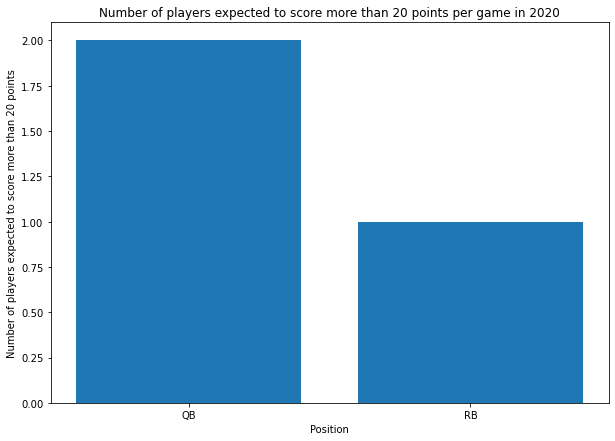

In [21]:
plt.figure(figsize=(10,7))

plt.bar(players_scoring_more_than_20_2020.index,players_scoring_more_than_20_2020['PLAYER NAME'].to_list())
plt.title('Number of players expected to score more than 20 points per game in 2020')
plt.xlabel('Position')
plt.ylabel('Number of players expected to score more than 20 points')
# plt.show()

In [22]:
#name of players who are expected to score more than 20 points per game
names_2019_2020.loc[names_2019_2020['2020 FPTS'] > 320].sort_values('2020 FPTS')

,PLAYER NAME,PLAYER POSITION,2019 FPTS,2020 FPTS
1,Patrick Mahomes,QB,287.04,332.66
0,Christian McCaffrey,RB,471.20,333.95
0,Lamar Jackson,QB,415.68,338.23


In [23]:
#between 10 and 15 
players_scoring_bw_10_15_2020 = names_2019_2020.loc[(names_2019_2020['2020 FPTS'] > 160) & (names_2019_2020['2020 FPTS'] < 15*16)].sort_values('2020 FPTS').groupby('PLAYER POSITION').count()
players_scoring_bw_10_15_2020

,PLAYER NAME,2019 FPTS,2020 FPTS
PLAYER POSITION,,,
QB,15,12,15
RB,20,17,20
TE,6,6,6
WR,42,40,42


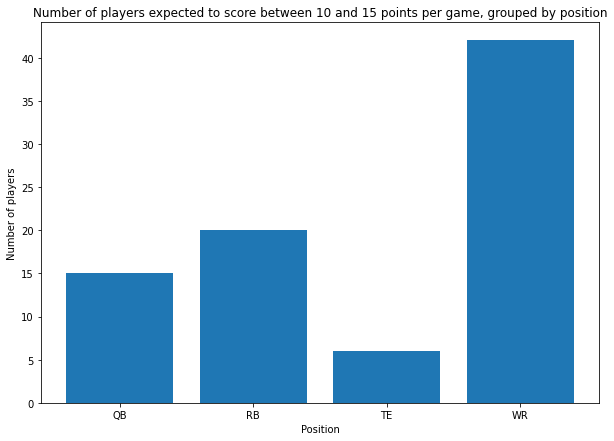

In [24]:
plt.figure(figsize=(10,7))

plt.bar(players_scoring_bw_10_15_2020.index,players_scoring_bw_10_15_2020['PLAYER NAME'].to_list())
plt.title('Number of players expected to score between 10 and 15 points per game, grouped by position')
plt.xlabel('Position')
plt.ylabel('Number of players')
plt.show()

# What does the distribution of projected points look like?

In [25]:
sorted_by_proj = names_2019_2020.sort_values('2020 FPTS', ascending = False)
sorted_by_proj

,PLAYER NAME,PLAYER POSITION,2019 FPTS,2020 FPTS
0,Lamar Jackson,QB,415.68,338.23
0,Christian McCaffrey,RB,471.20,333.95
1,Patrick Mahomes,QB,287.04,332.66
2,Deshaun Watson,QB,320.98,314.06
3,Dak Prescott,QB,337.78,301.71
...,...,...,...,...
337,Marken Michel,WR,NaN,0.00
338,Sammie Coates Jr.,WR,NaN,0.00
339,Antonio Callaway,WR,16.90,0.00
49,Tyler Bass,K,NaN,0.00


In [26]:
#drop all players who are expected zero points in 2020
sorted_by_proj = sorted_by_proj[sorted_by_proj['2020 FPTS'] != 0]
sorted_by_proj

,PLAYER NAME,PLAYER POSITION,2019 FPTS,2020 FPTS
0,Lamar Jackson,QB,415.68,338.23
0,Christian McCaffrey,RB,471.20,333.95
1,Patrick Mahomes,QB,287.04,332.66
2,Deshaun Watson,QB,320.98,314.06
3,Dak Prescott,QB,337.78,301.71
...,...,...,...,...
199,DeAndrew White,WR,9.10,0.12
151,Malcolm Perry,RB,NaN,0.12
198,Trent Sherfield,WR,12.00,0.12
150,Trenton Cannon,RB,0.00,0.12


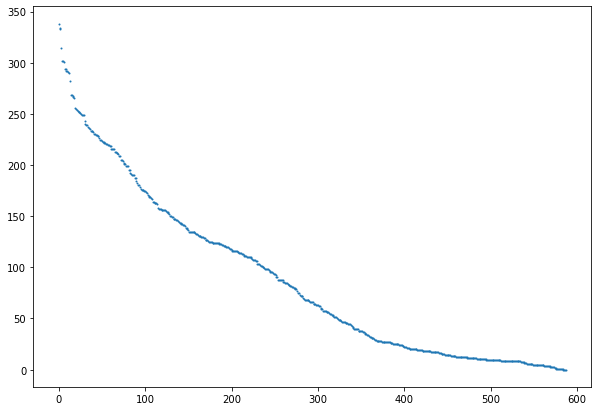

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(list(range(len(sorted_by_proj))), sorted_by_proj['2020 FPTS'], s =1)
plt.show()

# Plot projections based on position